In [1]:
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader

from nn_utils import MapsDataset, ConvNet, train_validate, plot_train_val_loss

In [14]:
DIR = os.path.abspath('./dataset')
LABEL_MAPPER = {'Cars': 0, 'Drones': 1, 'People': 2}
INV_LABEL_MAPPER = {v: k for k, v in LABEL_MAPPER.items()}
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def get_data_for_label(label):
    X, y = [], []
    for root, dirs, files in os.walk(os.path.join(DIR, label)):
        for file in files:
            if file.endswith('.csv'):
                y.append(LABEL_MAPPER[label])
                df = pd.read_csv(os.path.join(root, file), sep=',', header=None)
                X.append(df.values)
    print(f'Loaded {len(y)} examples for label {label} encoded with {LABEL_MAPPER[label]}')
    return X, y

X_cars, y_cars = get_data_for_label('Cars')
X_drones, y_drones = get_data_for_label('Drones')
X_people, y_people = get_data_for_label('People')

X = X_cars + X_drones + X_people
y = y_cars + y_drones + y_people
X, y = np.array(X), np.array(y)

%store X
%store y

%store -r X
%store -r y

Loaded 5720 examples for label Cars encoded with 0
Loaded 5065 examples for label Drones encoded with 1
Loaded 6700 examples for label People encoded with 2
Stored 'X' (ndarray)
Stored 'y' (ndarray)


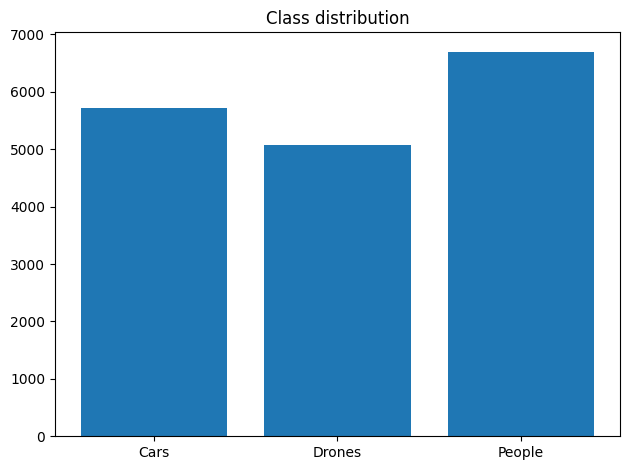

In [25]:
# classes = ['Cars', 'Drones', 'People']
# num_examples = [len(x) for x in [X_cars, X_drones, X_people]]
fig, ax = plt.subplots()
ax.bar(['Cars', 'Drones', 'People'], [len(x) for x in [y_cars, y_drones, y_people]])
ax.set_title('Class distribution')

plt.tight_layout()
plt.savefig("./figures/class_distribution.png", dpi=150)

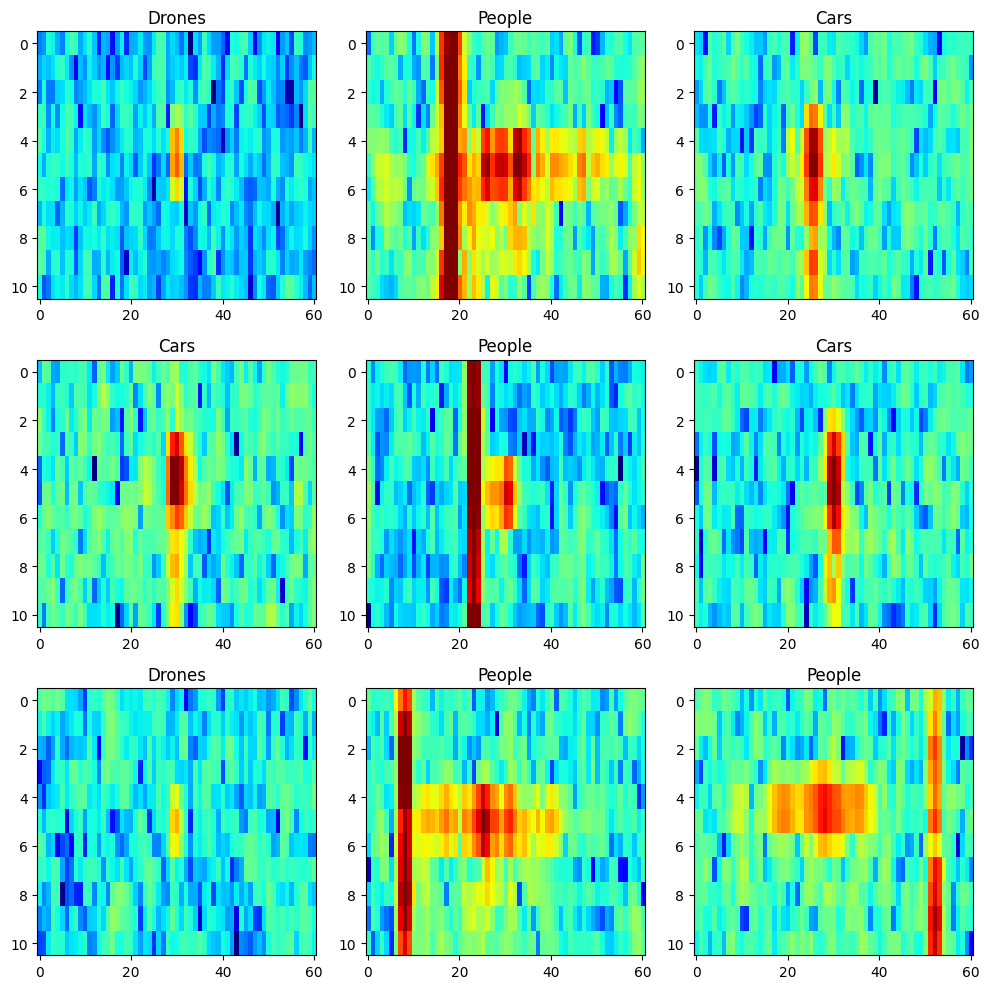

In [44]:
SEED = 27
# np.random.seed(SEED)

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, j in itertools.product(range(3), range(3)):
    index = np.random.randint(0, len(y)-1)
    img = axs[i, j].imshow(X[index], cmap='jet', vmin=-140, vmax=-70)
    axs[i, j].set_title(f'{INV_LABEL_MAPPER[y[index]]}')
    axs[i, j].axis('tight')

plt.tight_layout()
plt.savefig("./figures/class_examples.png", dpi=150)

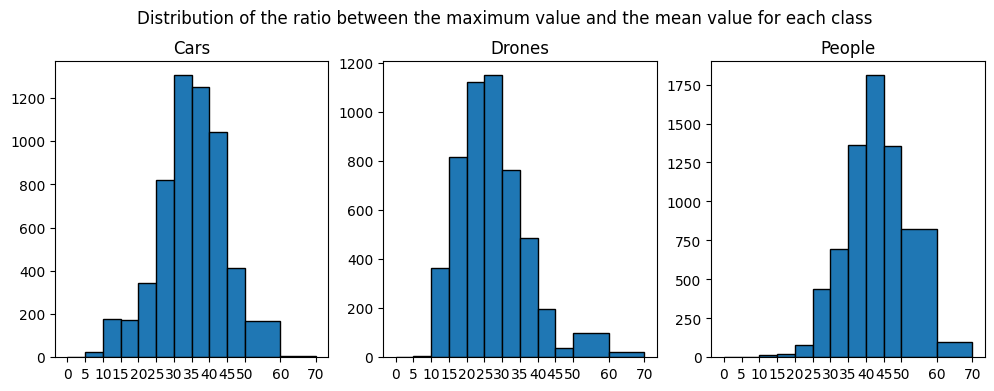

In [4]:
# It seems to be a wide dynamic range between the labels
# To dig into this issue we can explore the ratio between the maximum and mean value of the maps for each label

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(hspace=0.4, top=0.85)
BINS = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70]
for i, (label, value) in enumerate(LABEL_MAPPER.items()):
    X_label = X[np.where(y == value)]
    label_ratio = np.amax(X_label, (1, 2)) - np.mean(X_label, (1, 2))
    axs[i].hist(label_ratio, edgecolor = "black", bins=BINS)
    axs[i].set_xticks(BINS)
    axs[i].set_title(label)
fig.suptitle('Distribution of the ratio between the maximum value and the mean value for each class')
plt.show()